In [1]:
from elosports.elo import Elo
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/baseball_games.csv')
df

,date,team1,team2,score1,score2
0,2007-02-16,taylor (in),tennessee temple,5,4
1,2007-02-16,taylor (in),tennessee temple,4,0
2,2007-02-17,taylor (in),tennessee temple,5,6
3,2007-02-17,taylor (in),tennessee temple,9,3
4,2007-02-22,huntington (in),freed-hardeman,12,6
...,...,...,...,...,...
4673,2025-05-13,taylor (in),kansas wesleyan,5,7
4674,2025-05-13,science and arts,indiana wesleyan (in),9,11
4675,2025-05-14,indiana wesleyan (in),webber international (fl),1,11
4676,2025-05-14,grand view,taylor (in),11,10


# Elo Rating System

In [3]:
allTeams = set(df.team1.tolist())
allTeams.update(df.team2.tolist())
eloLeague = Elo(k=20)

In [4]:
for team in allTeams:
    eloLeague.addPlayer(team)

df['elo1_pre'] = 0.0
df['elo2_pre'] = 0.0
df['elo_prob1'] = 0.0
df['elo_prob2'] = 0.0
df['elo1_post'] = 0.0
df['elo2_post'] = 0.0

for game in df.iterrows():
    
    df.loc[game[0], 'elo1_pre'] = eloLeague.ratingDict[game[1].team1]
    df.loc[game[0], 'elo2_pre'] = eloLeague.ratingDict[game[1].team2]
    df.loc[game[0], 'elo_prob1'] = eloLeague.expectResult(eloLeague.ratingDict[game[1].team1], eloLeague.ratingDict[game[1].team2])
    df.loc[game[0], 'elo_prob2'] = eloLeague.expectResult(eloLeague.ratingDict[game[1].team2], eloLeague.ratingDict[game[1].team1])

    if game[1].score1 > game[1].score2:
        eloLeague.gameOver(game[1].team1, game[1].team2, True)
    else:
        eloLeague.gameOver(game[1].team2, game[1].team1, 0)
        
    df.loc[game[0], 'elo1_post'] = eloLeague.ratingDict[game[1].team1]
    df.loc[game[0], 'elo2_post'] = eloLeague.ratingDict[game[1].team2]

for team in eloLeague.ratingDict.keys():
    print(team, eloLeague.ratingDict[team])

saint xavier 1550.2256033987776
briar cliff 1474.9353797029505
william carey 1516.7631694496476
defiance college (oh) 1466.6347083838018
southern poly 1513.5601884371122
northwestern 1479.4217926763317
wayne state university 1514.889113866483
wiley 1476.4464658441798
baker 1513.178020571213
bryan (tn) 1578.2535110650774
park 1505.1000948595777
st. andrews 1523.7108011105952
morningside 1476.3526975379575
malone 1546.1717617942918
grand view 1464.4350810049405
huntington (in) 1538.1341448535984
spring arbor (mi) 1477.9938150213118
purdue university-north central 1499.9843056359416
valdosta state 1511.278696046897
indiana south bend 1296.9101373426624
william carey (ms) 1510.5353235824364
rio grande 1532.6832050744335
british columbia 1510.5491775128644
ohio dominican 1550.7916687141726
tougaloo 1389.3430029504966
ottawa 1521.8347666147968
spring arbor (in) 1484.3907380808234
webber international (fl) 1526.832982992341
kentucky christian 1470.6256662356482
butler 1511.8445828226031
goshe

In [5]:
df

,date,team1,team2,score1,score2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post
0,2007-02-16,taylor (in),tennessee temple,5,4,1500.000000,1500.000000,0.500000,0.500000,1507.198700,1492.801300
1,2007-02-16,taylor (in),tennessee temple,4,0,1507.198700,1492.801300,0.520708,0.479292,1514.020123,1485.979877
2,2007-02-17,taylor (in),tennessee temple,5,6,1514.020123,1485.979877,0.540266,0.459734,1500.493076,1499.506924
3,2007-02-17,taylor (in),tennessee temple,9,3,1500.493076,1499.506924,0.501419,0.498581,1507.665640,1492.334360
4,2007-02-22,huntington (in),freed-hardeman,12,6,1500.000000,1500.000000,0.500000,0.500000,1507.198700,1492.801300
...,...,...,...,...,...,...,...,...,...,...,...
4673,2025-05-13,taylor (in),kansas wesleyan,5,7,1788.069659,1486.364628,0.850274,0.149726,1769.871683,1504.562604
4674,2025-05-13,science and arts,indiana wesleyan (in),9,11,1500.000000,1604.408634,0.354109,0.645891,1490.126884,1614.281750
4675,2025-05-14,indiana wesleyan (in),webber international (fl),1,11,1614.281750,1511.581529,0.643638,0.356362,1599.030296,1526.832983
4676,2025-05-14,grand view,taylor (in),11,10,1448.811590,1769.871683,0.136088,0.863912,1464.435081,1754.248192


In [13]:
eloLeague.expectResult(eloLeague.ratingDict['grace (in)'], eloLeague.ratingDict['goshen (in)'])

0.7872696194271461

In [7]:
eloLeague.ratingDict['grace (in)']

1425.886361133443

In [8]:
df.to_csv('../data/baseball_games_elo.csv', index=False)

# Visualization

Text(0, 0.5, 'Teams')

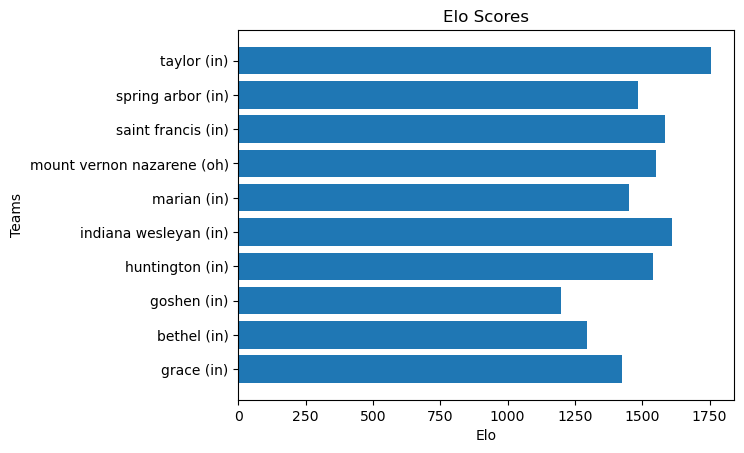

In [9]:
teams = ['grace (in)', 'bethel (in)', 'goshen (in)', 'huntington (in)', 'indiana wesleyan (in)', 'marian (in)', 'mount vernon nazarene (oh)', 'saint francis (in)', 'spring arbor (in)', 'taylor (in)']

elo_count = []
for team in teams:
    elo_count.append(eloLeague.ratingDict[team])

plt.barh(teams, elo_count)
plt.title('Elo Scores')
plt.xlabel('Elo')
plt.ylabel('Teams')

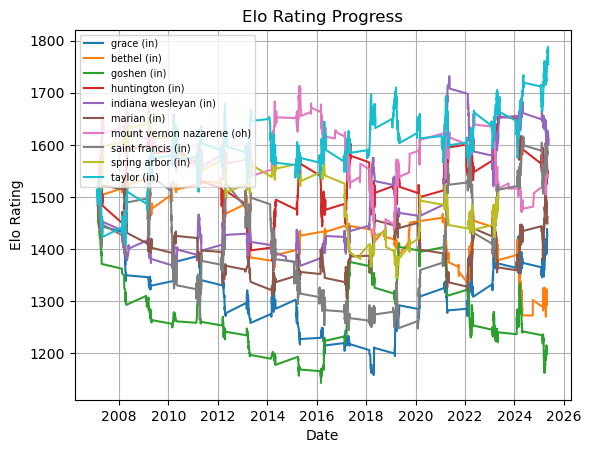

In [10]:
df['date'] = pd.to_datetime(df['date'])

#teams = ['grace (in)', 'goshen (in)']
for team in teams:
    team1_games = df[df['team1'] == team][['date', 'elo1_post']].rename(columns={'elo1_post': 'elo'})
    
    team2_games = df[df['team2'] == team][['date', 'elo2_post']].rename(columns={'elo2_post': 'elo'})

    team_games = pd.concat([team1_games, team2_games]).sort_values('date')

    plt.plot(team_games['date'], team_games['elo'], label=team)

plt.title('Elo Rating Progress')
plt.xlabel('Date')
plt.ylabel('Elo Rating')
plt.legend(fontsize=7, loc='upper left')
plt.grid(True)
plt.show()